In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob

In [3]:
jfo_ALFOSC = ascii.read('2020jfo-ALFOSC-2020-05-06.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_12 = ascii.read('2020jfo-FLOYDS-N-2020-05-12.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_06_13 = ascii.read('2020jfo-FLOYDS-N-2020-06-13.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_06_26 = ascii.read('2020jfo-FLOYDS-N-2020-06-26.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_07 = ascii.read('2020jfo-FLOYDS-S-2020-05-07.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_08 = ascii.read('2020jfo-FLOYDS-S-2020-05-08.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_10 = ascii.read('2020jfo-FLOYDS-S-2020-05-10.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_16 = ascii.read('2020jfo-FLOYDS-S-2020-05-16.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_19 = ascii.read('2020jfo-FLOYDS-S-2020-05-19.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_24 = ascii.read('2020jfo-FLOYDS-S-2020-05-24.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_27 = ascii.read('2020jfo-FLOYDS-S-2020-05-27.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_28 = ascii.read('2020jfo-FLOYDS-S-2020-05-28.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_06_05 = ascii.read('2020jfo-FLOYDS-S-2020-06-05.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_KAST_05_23 = ascii.read('2020jfo-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_KAST_07_27 = ascii.read('2020jfo-KAST-2020-07-27.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_LRIS_02_12 = ascii.read('2020jfo-LRIS-2021-02-12.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_06 = ascii.read('2020jfo-Unknown-2020-05-06.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_07 = ascii.read('2020jfo-Unknown-2020-05-07.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_11 = ascii.read('2020jfo-Unknown-2020-05-11.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_12 = ascii.read('2020jfo-Unknown-2020-05-12.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_14 = ascii.read('2020jfo-Unknown-2020-05-14.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_17 = ascii.read('2020jfo-Unknown-2020-05-17.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_19 = ascii.read('2020jfo-Unknown-2020-05-19.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_20 = ascii.read('2020jfo-Unknown-2020-05-20.csv', format = 'csv', header_start = 18, data_start = 19)


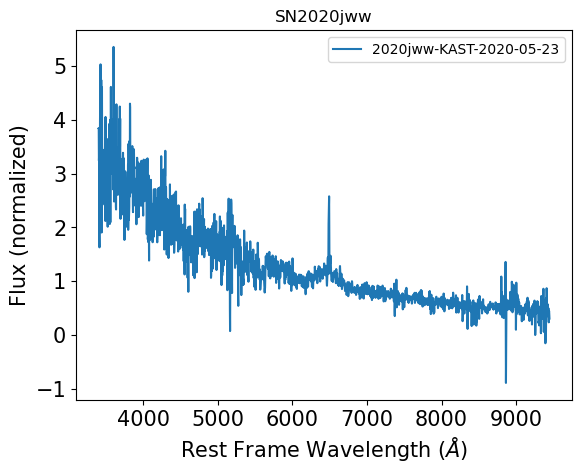

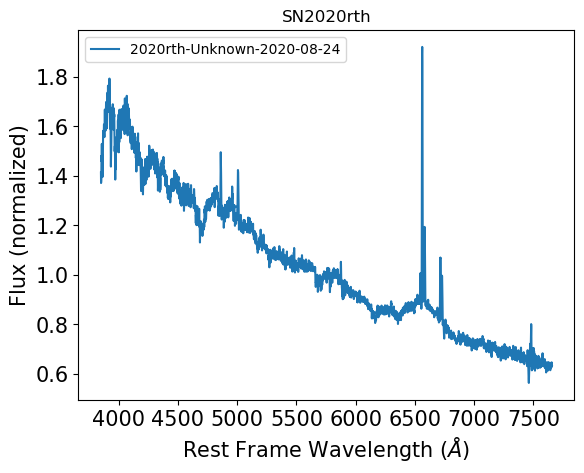

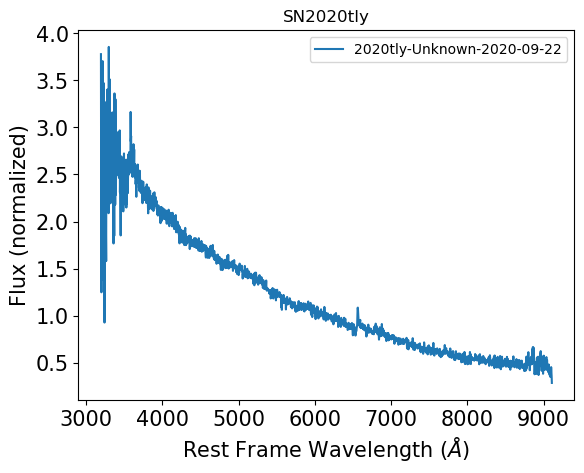

In [18]:
redshifts = [0.043, 0.005, 0.046, 0.0184, 0.058] 
spectra = glob.glob("*.csv")
for idx, file in enumerate(spectra):
    if 'jfo' in file:
        continue 
    if 'hgw' in file:
        continue
    object = ascii.read(file, format = 'csv', header_start = 18, data_start = 19)
    #print(object)
    wavelength = object['wavelength']
    flux = object['flux'] 
    if 'hgw' in file:
        z = redshifts[0]
    elif 'jfo' in file:
        z = redshifts[1] 
    elif 'ovk' in file:
        z = redshifts[2] 
    elif 'rth' in file:
        z = redshifts[3] 
    else:
        z = redshifts[4]
    label = file.split('.')[0]
    plt.figure(idx)
    plt.title('SN' + file.split('-')[0])
    plt.plot(wavelength / ( 1 + z), flux / np.median(flux), label = label)
    plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
    plt.ylabel('Flux (normalized)', fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.legend()

        


In [5]:
hgw_ALFOSC = ascii.read('2020hgw-ALFOSC-2020-04-29.csv', format = 'csv', header_start = 18, data_start = 19)
hgw_KAST = ascii.read('2020hgw-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
jww_KAST = ascii.read('2020jww-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
rth = ascii.read('2020rth-Unknown-2020-08-24.csv', format = 'csv', header_start = 18, data_start = 19)
tly = ascii.read('2020tly-Unknown-2020-09-22.csv', format = 'csv', header_start = 18, data_start = 19)

NOW WE START NA ID ANALYSIS AYOOOOOOOOOOO

FOR NOW IMA DO IT INVIVIDUALLY BUT I WILL ONE DAY MAKE IT A FUNCTION 

In [6]:
na_rest_wavelength = 5892

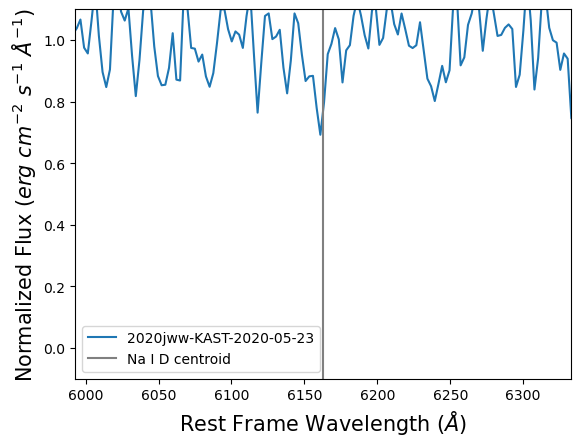

In [7]:
# gonna start with jww since i don't have to stack anything 
jww_centroid = na_rest_wavelength * (1 + redshifts[2])
jww_KAST_wavelength = jww_KAST['wavelength']
jww_KAST_flux = jww_KAST['flux'] 
lower_mask_jww = jww_centroid - 20
upper_mask_jww = jww_centroid + 20
mask_jww = (jww_KAST_wavelength > lower_mask_jww) & (jww_KAST_wavelength < upper_mask_jww)
continuum_jww = ((jww_KAST_wavelength > (lower_mask_jww - 150))&(jww_KAST_wavelength < (lower_mask_jww - 10))|(jww_KAST_wavelength > (upper_mask_jww + 10))&(jww_KAST_wavelength < (upper_mask_jww + 150)))
coeff_jww = np.polyfit(jww_KAST_wavelength[continuum_jww], jww_KAST_flux[continuum_jww], 2)
p_jww = np.poly1d(coeff_jww)
jww_flux_norm = jww_KAST_flux / p_jww(jww_KAST_wavelength)
plt.plot(jww_KAST_wavelength, jww_flux_norm, label = '2020jww-KAST-2020-05-23')
plt.xlim((lower_mask_jww - 150), (upper_mask_jww + 150))
plt.axvline(jww_centroid, color = 'grey', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux $(erg \ cm^{-2}\ s^{-1} \ \AA^{-1})$', fontsize = 15)
plt.legend()



the width of the absorption line is too small for there to be significant host reddening, so we can say it's 0

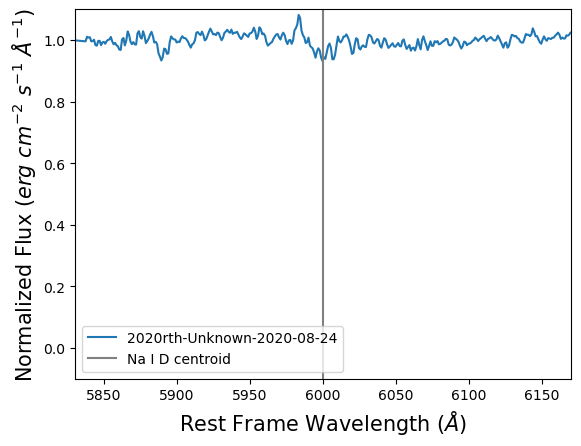

In [8]:
#rth time 
rth_centroid = na_rest_wavelength * (1 + redshifts[3])
rth_wavelength = rth['wavelength']
rth_flux = rth['flux']
lower_mask_rth = rth_centroid - 20 
upper_mask_rth = rth_centroid + 20 
mask_rth = (rth_wavelength > lower_mask_rth) & (rth_wavelength < upper_mask_rth)
continuum_rth = ((rth_wavelength > (lower_mask_rth - 150))&(rth_wavelength < (lower_mask_rth - 10))|(rth_wavelength > (upper_mask_rth + 10))&(rth_wavelength <(upper_mask_rth + 150)))
coeff_rth = np.polyfit(rth_wavelength[continuum_rth], rth_flux[continuum_rth],2)
p_rth = np.poly1d(coeff_rth)
rth_flux_norm = rth_flux / p_rth(rth_wavelength) 
plt.plot(rth_wavelength, rth_flux_norm, label = '2020rth-Unknown-2020-08-24')
plt.xlim((lower_mask_rth - 150), (upper_mask_rth + 150))
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux $(erg \ cm^{-2} \ s^{-1} \ \AA^{-1})$', fontsize = 15)
plt.axvline(rth_centroid, color = 'grey', label = 'Na I D centroid')
plt.legend()


In [9]:
rth_centroid

6000.4128

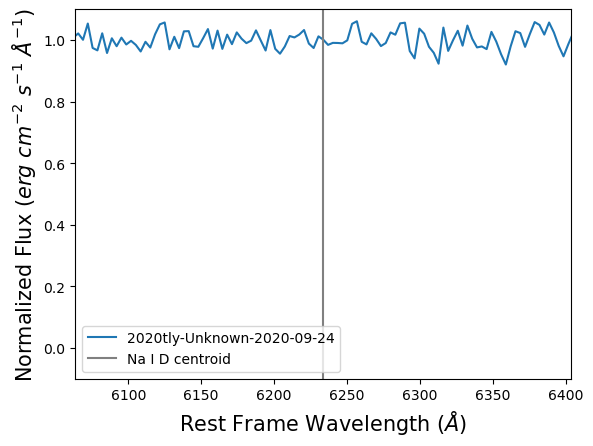

In [10]:
# tly 
tly_centroid = na_rest_wavelength * (1 + redshifts[4])
tly_wavelength = tly['wavelength']
tly_flux = tly['flux'] 
lower_mask_tly = tly_centroid - 20
upper_mask_tly = tly_centroid + 20
mask_tly = (tly_wavelength > lower_mask_tly) & (tly_wavelength < upper_mask_tly)
continuum_tly = ((tly_wavelength > (lower_mask_tly - 150))&(tly_wavelength < (lower_mask_tly - 10))|(tly_wavelength > (upper_mask_tly + 10))&(tly_wavelength < (upper_mask_tly + 150)))
coeff_tly= np.polyfit(tly_wavelength[continuum_tly], tly_flux[continuum_tly], 2)
p_tly = np.poly1d(coeff_tly)
tly_flux_norm = tly_flux / p_tly(tly_wavelength)
plt.plot(tly_wavelength, tly_flux_norm, label = '2020tly-Unknown-2020-09-24')
plt.xlim((lower_mask_tly - 150), (upper_mask_tly + 150))
plt.axvline(tly_centroid, color = 'grey', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux $(erg \ cm^{-2}\ s^{-1} \ \AA^{-1})$', fontsize = 15)
plt.legend()

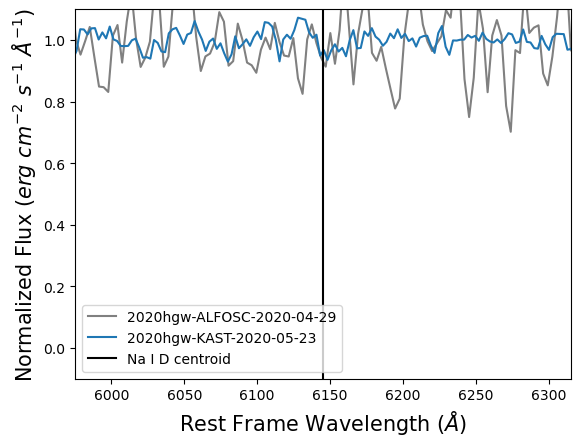

In [14]:
# hgw 
hgw_centroid = na_rest_wavelength * (1 + redshifts[0])
hgw_ALFOSC_wavelength = hgw_ALFOSC['wavelength']
hgw_ALFOSC_flux = hgw_ALFOSC['flux'] 
lower_mask_hgw_ALFOSC = hgw_centroid - 20
upper_mask_hgw_ALFOSC = hgw_centroid + 20
mask_hgw_ALFOSC = (hgw_ALFOSC_wavelength > lower_mask_hgw_ALFOSC) & (hgw_ALFOSC_wavelength < upper_mask_hgw_ALFOSC)
continuum_hgw_ALFOSC = ((hgw_ALFOSC_wavelength > (lower_mask_hgw_ALFOSC - 150))&(hgw_ALFOSC_wavelength < (lower_mask_hgw_ALFOSC - 10))|(hgw_ALFOSC_wavelength > (upper_mask_hgw_ALFOSC + 10))&(hgw_ALFOSC_wavelength < (upper_mask_hgw_ALFOSC + 150)))
coeff_hgw_ALFOSC= np.polyfit(hgw_ALFOSC_wavelength[continuum_hgw_ALFOSC], hgw_ALFOSC_flux[continuum_hgw_ALFOSC], 2)
p_hgw_ALFOSC = np.poly1d(coeff_hgw_ALFOSC)
hgw_ALFOSC_flux_norm = hgw_ALFOSC_flux / p_hgw_ALFOSC(hgw_ALFOSC_wavelength)
#stacking 
hgw_KAST_wavelength = hgw_KAST['wavelength']
hgw_KAST_flux = hgw_KAST['flux'] 
lower_mask_hgw_KAST = hgw_centroid - 20
upper_mask_hgw_KAST = hgw_centroid + 20
mask_hgw_KAST = (hgw_KAST_wavelength > lower_mask_hgw_KAST) & (hgw_KAST_wavelength < upper_mask_hgw_KAST)
continuum_hgw_KAST = ((hgw_KAST_wavelength > (lower_mask_hgw_KAST - 150))&(hgw_KAST_wavelength < (lower_mask_hgw_KAST - 10))|(hgw_KAST_wavelength > (upper_mask_hgw_KAST + 10))&(hgw_KAST_wavelength < (upper_mask_hgw_KAST + 150)))
coeff_hgw_KAST= np.polyfit(hgw_KAST_wavelength[continuum_hgw_KAST], hgw_KAST_flux[continuum_hgw_KAST], 2)
p_hgw_KAST = np.poly1d(coeff_hgw_KAST)
hgw_KAST_flux_norm = hgw_KAST_flux / p_hgw_KAST(hgw_KAST_wavelength)
plt.plot(hgw_ALFOSC_wavelength, hgw_ALFOSC_flux_norm, label = '2020hgw-ALFOSC-2020-04-29', color = 'gray')
plt.plot(hgw_KAST_wavelength, hgw_KAST_flux_norm, label = '2020hgw-KAST-2020-05-23')
plt.xlim((lower_mask_hgw_KAST - 150), (upper_mask_hgw_KAST + 150))
plt.axvline(hgw_centroid, color = 'k', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux $(erg \ cm^{-2}\ s^{-1} \ \AA^{-1})$', fontsize = 15)
plt.legend()

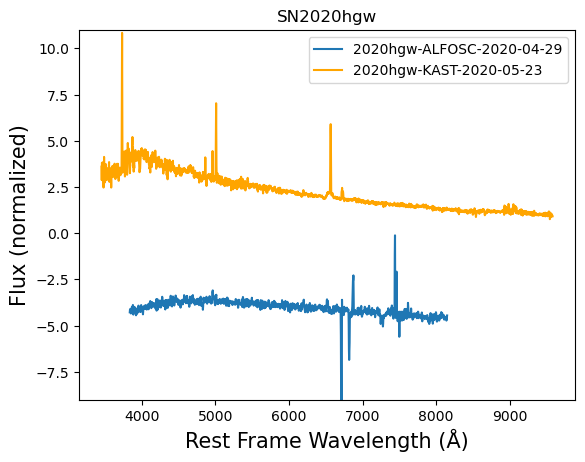

In [19]:
plt.figure()
plt.plot(hgw_ALFOSC_wavelength / (1 + redshifts[0]), hgw_ALFOSC_flux / np.median(hgw_ALFOSC_flux) - 5, label = '2020hgw-ALFOSC-2020-04-29')
plt.plot(hgw_KAST_wavelength / (1 + redshifts[0]), hgw_KAST_flux / np.median(hgw_KAST_flux) * 2, label = '2020hgw-KAST-2020-05-23', color = 'orange')
plt.ylim(-9, 11)
plt.xlabel('Rest Frame Wavelength (Å)', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.title('SN2020hgw')
plt.legend()

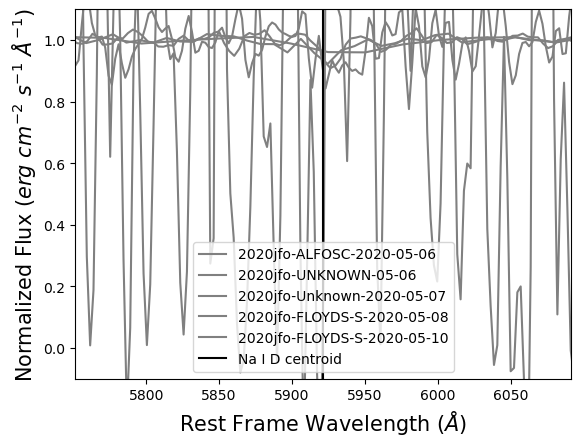

In [45]:
#jfo 
#only really want early time spectra, closest to explosion
jfo_centroid = na_rest_wavelength * (1 + redshifts[1])


jfo_ALFOSC_wavelength = jfo_ALFOSC['wavelength']
jfo_ALFOSC_flux = jfo_ALFOSC['flux']
lower_mask_jfo_ALFOSC = jfo_centroid - 20
upper_mask_jfo_ALFOSC = jfo_centroid + 20
mask_jfo_ALFOSC = (jfo_ALFOSC_wavelength > lower_mask_jfo_ALFOSC) & (jfo_ALFOSC_wavelength < upper_mask_jfo_ALFOSC)
continuum_jfo_ALFOSC = ((jfo_ALFOSC_wavelength > (lower_mask_jfo_ALFOSC - 150))&(jfo_ALFOSC_wavelength < (lower_mask_jfo_ALFOSC - 10))|(jfo_ALFOSC_wavelength > (upper_mask_jfo_ALFOSC + 10))&(jfo_ALFOSC_wavelength < (upper_mask_jfo_ALFOSC + 150)))
coeff_jfo_ALFOSC= np.polyfit(jfo_ALFOSC_wavelength[continuum_jfo_ALFOSC], jfo_ALFOSC_flux[continuum_jfo_ALFOSC], 3)
p_jfo_ALFOSC = np.poly1d(coeff_jfo_ALFOSC)
jfo_ALFOSC_flux_norm = jfo_ALFOSC_flux / p_jfo_ALFOSC(jfo_ALFOSC_wavelength)

jfo_UNKNOWN_05_06_wavelength = jfo_UNKNOWN_05_06['wavelength']
jfo_UNKNOWN_05_06_flux = jfo_UNKNOWN_05_06['flux']
lower_mask_jfo_UK_0506 = jfo_centroid - 20
upper_mask_jfo_UK_0506= jfo_centroid + 20
mask_jfo_UK_0506 = (jfo_UNKNOWN_05_06_wavelength > lower_mask_jfo_UK_0506) & (jfo_UNKNOWN_05_06_wavelength < upper_mask_jfo_UK_0506)
continuum_jfo_UK0506 = ((jfo_UNKNOWN_05_06_wavelength > (lower_mask_jfo_UK_0506 - 150))&(jfo_UNKNOWN_05_06_wavelength < (lower_mask_jfo_UK_0506 - 10))|(jfo_UNKNOWN_05_06_wavelength > (upper_mask_jfo_UK_0506 + 10))&(jfo_UNKNOWN_05_06_wavelength < (upper_mask_jfo_UK_0506 + 150)))
coeff_jfo_UK0506= np.polyfit(jfo_UNKNOWN_05_06_wavelength[continuum_jfo_UK0506], jfo_UNKNOWN_05_06_flux[continuum_jfo_UK0506], 3)
p_jfo_UK0506 = np.poly1d(coeff_jfo_UK0506)
jfo_UK0506_flux_norm = jfo_UNKNOWN_05_06_flux / p_jfo_UK0506(jfo_UNKNOWN_05_06_wavelength)



jfo_F0507_wavelength = jfo_FLOYDS_05_07['wavelength']
jfo_F0507_flux = jfo_FLOYDS_05_07['flux']
lower_mask_jfo_F0507 = jfo_centroid - 20 
upper_mask_jfo_F0507 = jfo_centroid + 20 
mask_jfo_F0507 = (jfo_F0507_wavelength > lower_mask_jfo_F0507) & (jfo_F0507_wavelength < upper_mask_jfo_F0507)
continuum_jfo_F0507 = ((jfo_F0507_wavelength > (lower_mask_jfo_F0507 - 150))&(jfo_F0507_wavelength < (lower_mask_jfo_F0507 - 10))|(jfo_F0507_wavelength > (upper_mask_jfo_F0507 + 10))&(jfo_F0507_wavelength < (upper_mask_jfo_F0507 + 150)))
coeff_jfo_F0507= np.polyfit(jfo_F0507_wavelength[continuum_jfo_F0507], jfo_F0507_flux[continuum_jfo_F0507], 3)
p_jfo_F0507 = np.poly1d(coeff_jfo_F0507)
jfo_F0507_flux_norm = jfo_F0507_flux / p_jfo_F0507(jfo_F0507_wavelength)


jfo_U0507_wavelength = jfo_UNKNOWN_05_07['wavelength']
jfo_U0507_flux = jfo_UNKNOWN_05_07['flux']
lower_mask_jfo_U0507 = jfo_centroid - 20 
upper_mask_jfo_U0507 = jfo_centroid + 20 
mask_jfo_U0507 = (jfo_U0507_wavelength > lower_mask_jfo_U0507) & (jfo_U0507_wavelength < upper_mask_jfo_U0507)
continuum_jfo_U0507 = ((jfo_U0507_wavelength > (lower_mask_jfo_U0507 - 150))&(jfo_U0507_wavelength < (lower_mask_jfo_U0507 - 10))|(jfo_U0507_wavelength > (upper_mask_jfo_U0507 + 10))&(jfo_U0507_wavelength < (upper_mask_jfo_U0507 + 150)))
coeff_jfo_U0507= np.polyfit(jfo_U0507_wavelength[continuum_jfo_U0507], jfo_U0507_flux[continuum_jfo_U0507], 3)
p_jfo_U0507 = np.poly1d(coeff_jfo_U0507)
jfo_U0507_flux_norm = jfo_U0507_flux / p_jfo_U0507(jfo_U0507_wavelength)


jfo_F0508_wavelength = jfo_FLOYDS_05_08['wavelength']
jfo_F0508_flux = jfo_FLOYDS_05_08['flux']
lower_mask_jfo_F0508 = jfo_centroid - 20 
upper_mask_jfo_F0508 = jfo_centroid + 20 
mask_jfo_F0508 = (jfo_F0508_wavelength > lower_mask_jfo_F0508) & (jfo_F0508_wavelength < upper_mask_jfo_F0508)
continuum_jfo_F0508 = ((jfo_F0508_wavelength > (lower_mask_jfo_F0508 - 150))&(jfo_F0508_wavelength < (lower_mask_jfo_F0508 - 10))|(jfo_F0508_wavelength > (upper_mask_jfo_F0508 + 10))&(jfo_F0508_wavelength < (upper_mask_jfo_F0508 + 150)))
coeff_jfo_F0508 = np.polyfit(jfo_F0508_wavelength[continuum_jfo_F0508], jfo_F0508_flux[continuum_jfo_F0508], 3)
p_jfo_F0508 = np.poly1d(coeff_jfo_F0508)
jfo_F0508_flux_norm = jfo_F0508_flux / p_jfo_F0508(jfo_F0508_wavelength)


jfo_F0510_wavelength = jfo_FLOYDS_05_10['wavelength']
jfo_F0510_flux = jfo_FLOYDS_05_10['flux']
lower_mask_jfo_F0510 = jfo_centroid - 20 
upper_mask_jfo_F0510 = jfo_centroid + 20 
mask_jfo_F0510 = (jfo_F0510_wavelength > lower_mask_jfo_F0510) & (jfo_F0510_wavelength < upper_mask_jfo_F0510)
continuum_jfo_F0510 = ((jfo_F0510_wavelength > (lower_mask_jfo_F0510 - 150))&(jfo_F0510_wavelength < (lower_mask_jfo_F0510 - 10))|(jfo_F0510_wavelength > (upper_mask_jfo_F0510 + 10))&(jfo_F0510_wavelength < (upper_mask_jfo_F0510 + 150)))
coeff_jfo_F0510 = np.polyfit(jfo_F0510_wavelength[continuum_jfo_F0510], jfo_F0510_flux[continuum_jfo_F0510], 3)
p_jfo_F0510 = np.poly1d(coeff_jfo_F0510)
jfo_F0510_flux_norm = jfo_F0510_flux / p_jfo_F0510(jfo_F0510_wavelength)



plt.plot(jfo_ALFOSC_wavelength, jfo_ALFOSC_flux_norm, label = '2020jfo-ALFOSC-2020-05-06', color = 'gray')
plt.plot(jfo_UNKNOWN_05_06_wavelength, jfo_UK0506_flux_norm, label = '2020jfo-UNKNOWN-05-06', color = 'gray')
plt.plot(jfo_U0507_wavelength, jfo_U0507_flux_norm, label = '2020jfo-Unknown-2020-05-07', color = 'gray')
plt.plot(jfo_F0508_wavelength, jfo_F0508_flux_norm, label = '2020jfo-FLOYDS-S-2020-05-08', color = 'gray')
plt.plot(jfo_F0510_wavelength, jfo_F0510_flux_norm, label = '2020jfo-FLOYDS-S-2020-05-10', color = 'gray')
plt.xlim((lower_mask_jfo_ALFOSC - 150), (upper_mask_jfo_ALFOSC + 150))
plt.ylim(-0.1, 1.1)
plt.axvline(jfo_centroid, color = 'k', label = 'Na I D centroid')
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux $(erg \ cm^{-2}\ s^{-1} \ \AA^{-1})$', fontsize = 15)
plt.legend()

In [ ]:
plt.figure()
plt.plot(jfo_ALFOSC_wavelength / (1 + redshifts[0]), hgw_ALFOSC_flux / np.median(hgw_ALFOSC_flux) - 5, label = '2020hgw-ALFOSC-2020-04-29')
plt.plot(hgw_KAST_wavelength / (1 + redshifts[0]), hgw_KAST_flux / np.median(hgw_KAST_flux) * 2, label = '2020hgw-KAST-2020-05-23', color = 'orange')
plt.ylim(-9, 11)
plt.xlabel('Rest Frame Wavelength (Å)', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.title('SN2020hgw')
plt.legend()